<b>Importing Related Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<b>Preprocessing

In [2]:
df = pd.read_csv("D:\Kumpulan Tugas\Semester 5\CERTAN/Mall_customerscsv.csv")

In [3]:
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.tail(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
180,181,Female,37,97,32
181,182,Female,32,97,86
182,183,Male,46,98,15
183,184,Female,29,98,88
184,185,Female,41,99,39
185,186,Male,30,99,97
186,187,Female,54,101,24
187,188,Male,28,101,68
188,189,Female,41,103,17
189,190,Female,36,103,85


In [5]:
df.shape

(200, 5)

In [6]:
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [8]:
df = df.iloc[:, [3,4]].values

In [9]:
df

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

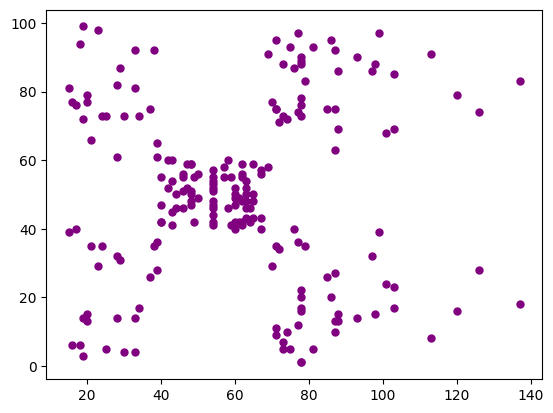

In [12]:
plt.scatter(df[:,0], df[:,1], s=25, c= "purple")

In [13]:
from sklearn.cluster import KMeans

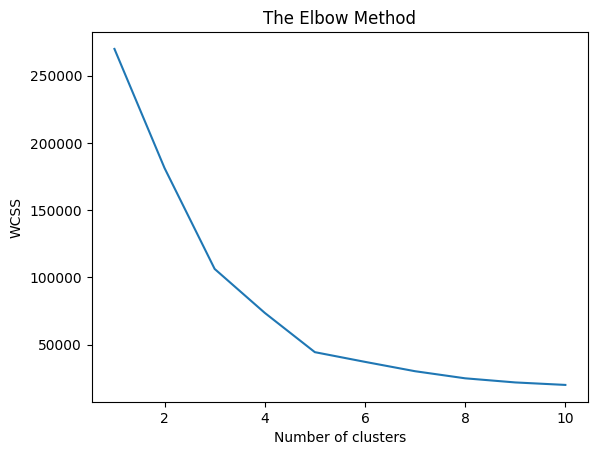

In [14]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
dbscan = DBSCAN(eps=5, min_samples=5)

In [17]:
labels = dbscan.fit_predict(df)

In [18]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

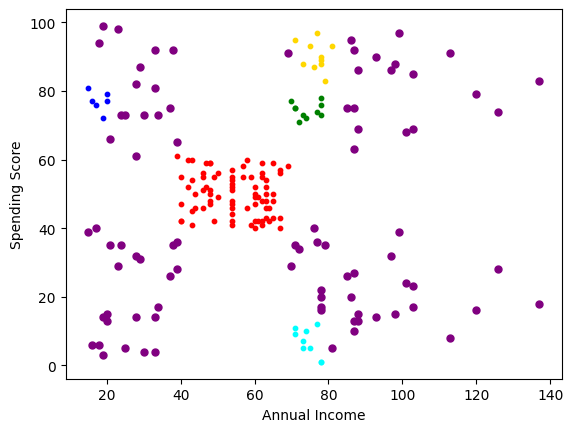

In [20]:
# Visualising the clusters
plt.scatter(df[labels == -1, 0], df[labels == -1, 1], s = 25, c = 'purple') 

plt.scatter(df[labels == 0, 0], df[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(df[labels == 1, 0], df[labels == 1, 1], s = 10, c = 'red')
plt.scatter(df[labels == 2, 0], df[labels == 2, 1], s = 10, c = 'green')
plt.scatter(df[labels == 3, 0], df[labels == 3, 1], s = 10, c = 'aqua')
plt.scatter(df[labels == 4, 0], df[labels == 4, 1], s = 10, c = 'gold')
    
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [21]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette score for KMeans clustering
kmeans_silhouette_score = silhouette_score(df, kmeans.labels_)
print("Silhouette score for KMeans:", kmeans_silhouette_score)

# Calculate the Silhouette score for DBSCAN clustering
dbscan_silhouette_score = silhouette_score(df, labels)
print("Silhouette score for DBSCAN:", dbscan_silhouette_score)


Silhouette score for KMeans: 0.44156027619254706
Silhouette score for DBSCAN: 0.1135163893571667
